In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm

# 1.读取新下载带uid的星表

In [2]:
uid_path =  r'./obsid_uid.csv'
uid_catalog=pd.read_csv(uid_path, comment='#')

In [3]:
uid_catalog

,obsid,uid
0,37510071,G17510517397829
1,37510072,G17510490491946
2,37510073,G17510482152407
3,37510075,G17510481919106
4,37510077,G17510573901578
...,...,...
11944044,37510066,G17509607563395
11944045,37510067,G17510483086897
11944046,37510068,G17509592765750
11944047,37510069,G17509676032737


In [4]:
uid_catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11944049 entries, 0 to 11944048
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   obsid   int64 
 1   uid     object
dtypes: int64(1), object(1)
memory usage: 182.3+ MB


# 2.读取SpecTE catalog

In [5]:
path = r'../2_catalog_SpecTE-LAMOST/catalog.csv'
SpecTE_catalog=pd.read_csv(path)

In [6]:
SpecTE_catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798538 entries, 0 to 9798537
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   obsid                int64  
 1   ra                   float64
 2   dec                  float64
 3   snrg                 float64
 4   Teff[K]              float64
 5   Teff[K]_uncertainty  float64
 6   Logg                 float64
 7   Logg_uncertainty     float64
 8   RV                   float64
 9   RV_uncertainty       float64
 10  FeH                  float64
 11  FeH_uncertainty      float64
 12  MgH                  float64
 13  MgH_uncertainty      float64
 14  SiH                  float64
 15  SiH_uncertainty      float64
 16  SH                   float64
 17  SH_uncertainty       float64
 18  KH                   float64
 19  KH_uncertainty       float64
 20  CaH                  float64
 21  CaH_uncertainty      float64
 22  TiH                  float64
 23  TiH_uncertainty      float64
 24

# 3. 为星表加上uid

In [7]:

# # 将combined_obsid和obsid转换为相同的数据类型以确保它们匹配
# uid_catalog['combined_obsid'] = uid_catalog['combined_obsid'].astype(int)

# 进行合并操作
merged_catalog = SpecTE_catalog.merge(uid_catalog[['obsid', 'uid']], 
                                     left_on='obsid', 
                                     right_on='obsid', 
                                     how='left')




In [8]:
merged_catalog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9798538 entries, 0 to 9798537
Data columns (total 43 columns):
 #   Column               Dtype  
---  ------               -----  
 0   obsid                int64  
 1   ra                   float64
 2   dec                  float64
 3   snrg                 float64
 4   Teff[K]              float64
 5   Teff[K]_uncertainty  float64
 6   Logg                 float64
 7   Logg_uncertainty     float64
 8   RV                   float64
 9   RV_uncertainty       float64
 10  FeH                  float64
 11  FeH_uncertainty      float64
 12  MgH                  float64
 13  MgH_uncertainty      float64
 14  SiH                  float64
 15  SiH_uncertainty      float64
 16  SH                   float64
 17  SH_uncertainty       float64
 18  KH                   float64
 19  KH_uncertainty       float64
 20  CaH                  float64
 21  CaH_uncertainty      float64
 22  TiH                  float64
 23  TiH_uncertainty      float64
 24

In [9]:
# # 去除不需要的列
# merged_catalog.drop(columns=['combined_obsid'], inplace=True)
merged_catalog

,obsid,ra,dec,snrg,Teff[K],Teff[K]_uncertainty,Logg,Logg_uncertainty,RV,RV_uncertainty,...,OH_uncertainty,AlH,AlH_uncertainty,MnH,MnH_uncertainty,NaH,NaH_uncertainty,VH,VH_uncertainty,uid
0,101001,332.202274,-2.056767,12.22,5149.019186,107.856341,4.490755,0.100001,-32.980172,10.198809,...,0.174559,-0.338310,0.150219,-0.705042,0.181825,-0.675052,0.686339,-0.736398,0.478321,G12763466510210
1,101009,332.206665,-1.868653,12.63,5720.460288,135.123599,4.058886,0.285110,-18.054290,9.190242,...,0.188533,-0.089937,0.142646,-0.379029,0.188097,-0.500810,0.598798,-0.420831,0.405779,G12763486062568
2,101048,331.854516,-1.617455,12.08,5787.795613,125.883540,3.851010,0.400518,-126.662359,16.639725,...,0.259811,-0.580809,0.309770,-0.938254,0.298207,-0.892373,0.681761,-0.830071,0.529764,G12763451335221
3,101060,331.698572,-1.353523,10.59,6180.429133,205.621083,4.025663,0.310743,15.411011,24.359543,...,0.212613,-0.235427,0.226468,-0.321669,0.270013,-0.539388,0.599174,-0.383766,0.378262,G12762577050517
4,101080,332.015808,-1.712806,10.25,5117.285699,92.109695,4.528147,0.043553,1.461230,8.547154,...,0.143359,-0.249869,0.130820,-0.644178,0.143633,-0.602995,0.620940,-0.616111,0.412343,G12763498532606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798533,1128114211,282.281051,35.596414,88.33,5639.430060,249.313311,3.659009,0.609454,-70.274478,15.823246,...,0.171339,-0.283253,0.210576,-0.463401,0.191209,-0.453880,0.489704,-0.415799,0.391494,G13890552173809
9798534,1128114221,282.148819,35.679397,82.59,5516.419237,53.893873,4.033165,0.100807,-42.875917,4.208688,...,0.048421,0.509637,0.052375,0.404647,0.043522,0.530261,0.132195,0.254474,0.174817,G13890676894149
9798535,1128115048,284.570736,36.215758,99.77,5333.518538,39.817300,4.498938,0.028033,27.887928,2.359445,...,0.067467,0.116840,0.040170,0.036915,0.037725,-0.019604,0.259248,-0.036422,0.149768,G14023292345150
9798536,1128115182,284.218554,35.774518,97.53,6225.834024,78.509956,4.190070,0.111882,-22.763226,3.782047,...,0.096361,-0.167170,0.061403,-0.310340,0.100052,-0.638200,0.548196,-0.308657,0.238707,G13889942406367


# 4.统计不确定性值
计算不同区间的不确定性值

In [10]:
# # 定义不同信噪比（SNR）区域的列表

snr_region_list = [[10, 15], [15, 20], 
                   [20, 25], [25, 30], 
                   [30, 35], [35, 40],
                   [40, 45], [45, 50], 
                   [50, 55], [55, 60], 
                   [60, 65], [65, 70],
                   [70, 75], [75, 80], 
                   [80, 85], [85, 90], 
                   [90, 95], [95, 100],
                   [100,100]]  # 信噪比区域，最后一个为 >= 100


# 定义要估计的不确定性标签
label_name_list = ['Teff[K]', 'Logg', 'RV', 'FeH', 'MgH', 'SiH', 'SH', 'KH', 'CaH', 'TiH', 'CrH', 'NiH', 'CH', 'NH', 'OH', 'AlH', 'MnH','NaH', 'VH']

# 从 SpecTE_catalog 数据中提取不确定性估计
SpecTE_pred_err = merged_catalog[["%s_uncertainty" % name for name in label_name_list]].values.astype(np.float32)
# 计算 SNR 的最小值
snrg = merged_catalog['snrg']
# 初始化一个数组来存储每个 SNR 区域的不确定性
errorbar_SpecTE_pred = np.zeros((len(snr_region_list), len(label_name_list)))

# 计算重复观测的不确定性
# 按 obsid 分组并计算计数、均值和标准差
gr_count = merged_catalog.groupby(by=['uid']).count()
gr_mean = merged_catalog.groupby(by=['uid']).mean()
gr_std = merged_catalog.groupby(by=['uid']).std()
# 仅保留 min_snr >= 5 的观测值
mean_gr = gr_mean[gr_count['snrg'] >= 5][label_name_list].values
std_gr = gr_std[gr_count['snrg'] >= 5][label_name_list].values
snr_gr = gr_mean[gr_count['snrg'] >= 5]["snrg"]
# 初始化一个数组来存储每个 SNR 区域的重复观测不确定性
errorbar_repeated_observation = np.zeros((len(snr_region_list), len(label_name_list)))


In [11]:

# 遍历每个 SNR 区域
count = 0
for snr_region in tqdm(snr_region_list):
    # 根据 SNR 区域划分数据索引
    if snr_region[0] < snr_region[1]:
        snr_index_SpecTE_pred = np.where(snrg.apply(lambda x: True if x < snr_region[1] and x >= snr_region[0] else False))[0]
        snr_index_repeated_observation = np.where(snr_gr.apply(lambda x: True if x < snr_region[1] and x >= snr_region[0] else False))[0]
    else:  # 处理最后一个 SNR 区域
        snr_index_SpecTE_pred = np.where(snrg.apply(lambda x: True if x >= snr_region[0] else False))[0]
        snr_index_repeated_observation = np.where(snr_gr.apply(lambda x: True if x >= snr_region[0] else False))[0]
    
    # 计算每个 SNR 区域内的不确定性均值
    err_mean_SpecTE_pred = SpecTE_pred_err[snr_index_SpecTE_pred].mean(axis=0)
    err_mean_repeated_observation = std_gr[snr_index_repeated_observation].mean(axis=0)
    
    # 将计算结果存入数组
    errorbar_SpecTE_pred[count] = err_mean_SpecTE_pred
    errorbar_repeated_observation[count] = err_mean_repeated_observation
    count += 1


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:28<00:00,  1.48s/it]


In [12]:
errorbar_SpecTE_pred

array([[1.93766556e+02, 3.76401007e-01, 1.80914803e+01, 1.57788977e-01,
        1.56763628e-01, 1.58481494e-01, 2.03059226e-01, 2.09124222e-01,
        1.48807645e-01, 2.57096231e-01, 3.13368559e-01, 1.66764915e-01,
        1.74574167e-01, 2.90157497e-01, 1.81107074e-01, 1.92354664e-01,
        2.09836721e-01, 4.85917300e-01, 3.55435461e-01],
       [1.67835297e+02, 3.03379923e-01, 1.48107224e+01, 1.31575361e-01,
        1.36458218e-01, 1.37961119e-01, 1.88410312e-01, 2.01232478e-01,
        1.33839056e-01, 2.50045687e-01, 3.12804520e-01, 1.44052282e-01,
        1.53327182e-01, 2.82479763e-01, 1.70673728e-01, 1.72079623e-01,
        1.83569267e-01, 4.88760501e-01, 3.50694448e-01],
       [1.53704025e+02, 2.63044149e-01, 1.29077559e+01, 1.15759037e-01,
        1.23633631e-01, 1.25236794e-01, 1.77505255e-01, 1.96959749e-01,
        1.24897175e-01, 2.46023610e-01, 3.13269287e-01, 1.30210489e-01,
        1.40274405e-01, 2.77559370e-01, 1.64378941e-01, 1.59833699e-01,
        1.67114004e-01

# 5.画图

153.7040252685547
0.263044148683548
12.907755851745605
0.11575903743505478
0.12363363057374954
0.12523679435253143
0.1775052547454834
0.1969597488641739
0.12489717453718185
0.24602361023426056
0.3132692873477936
0.1302104890346527
0.14027440547943115
0.277559369802475
0.16437894105911255
0.15983369946479797
0.1671140044927597
0.4873840808868408
0.34507375955581665


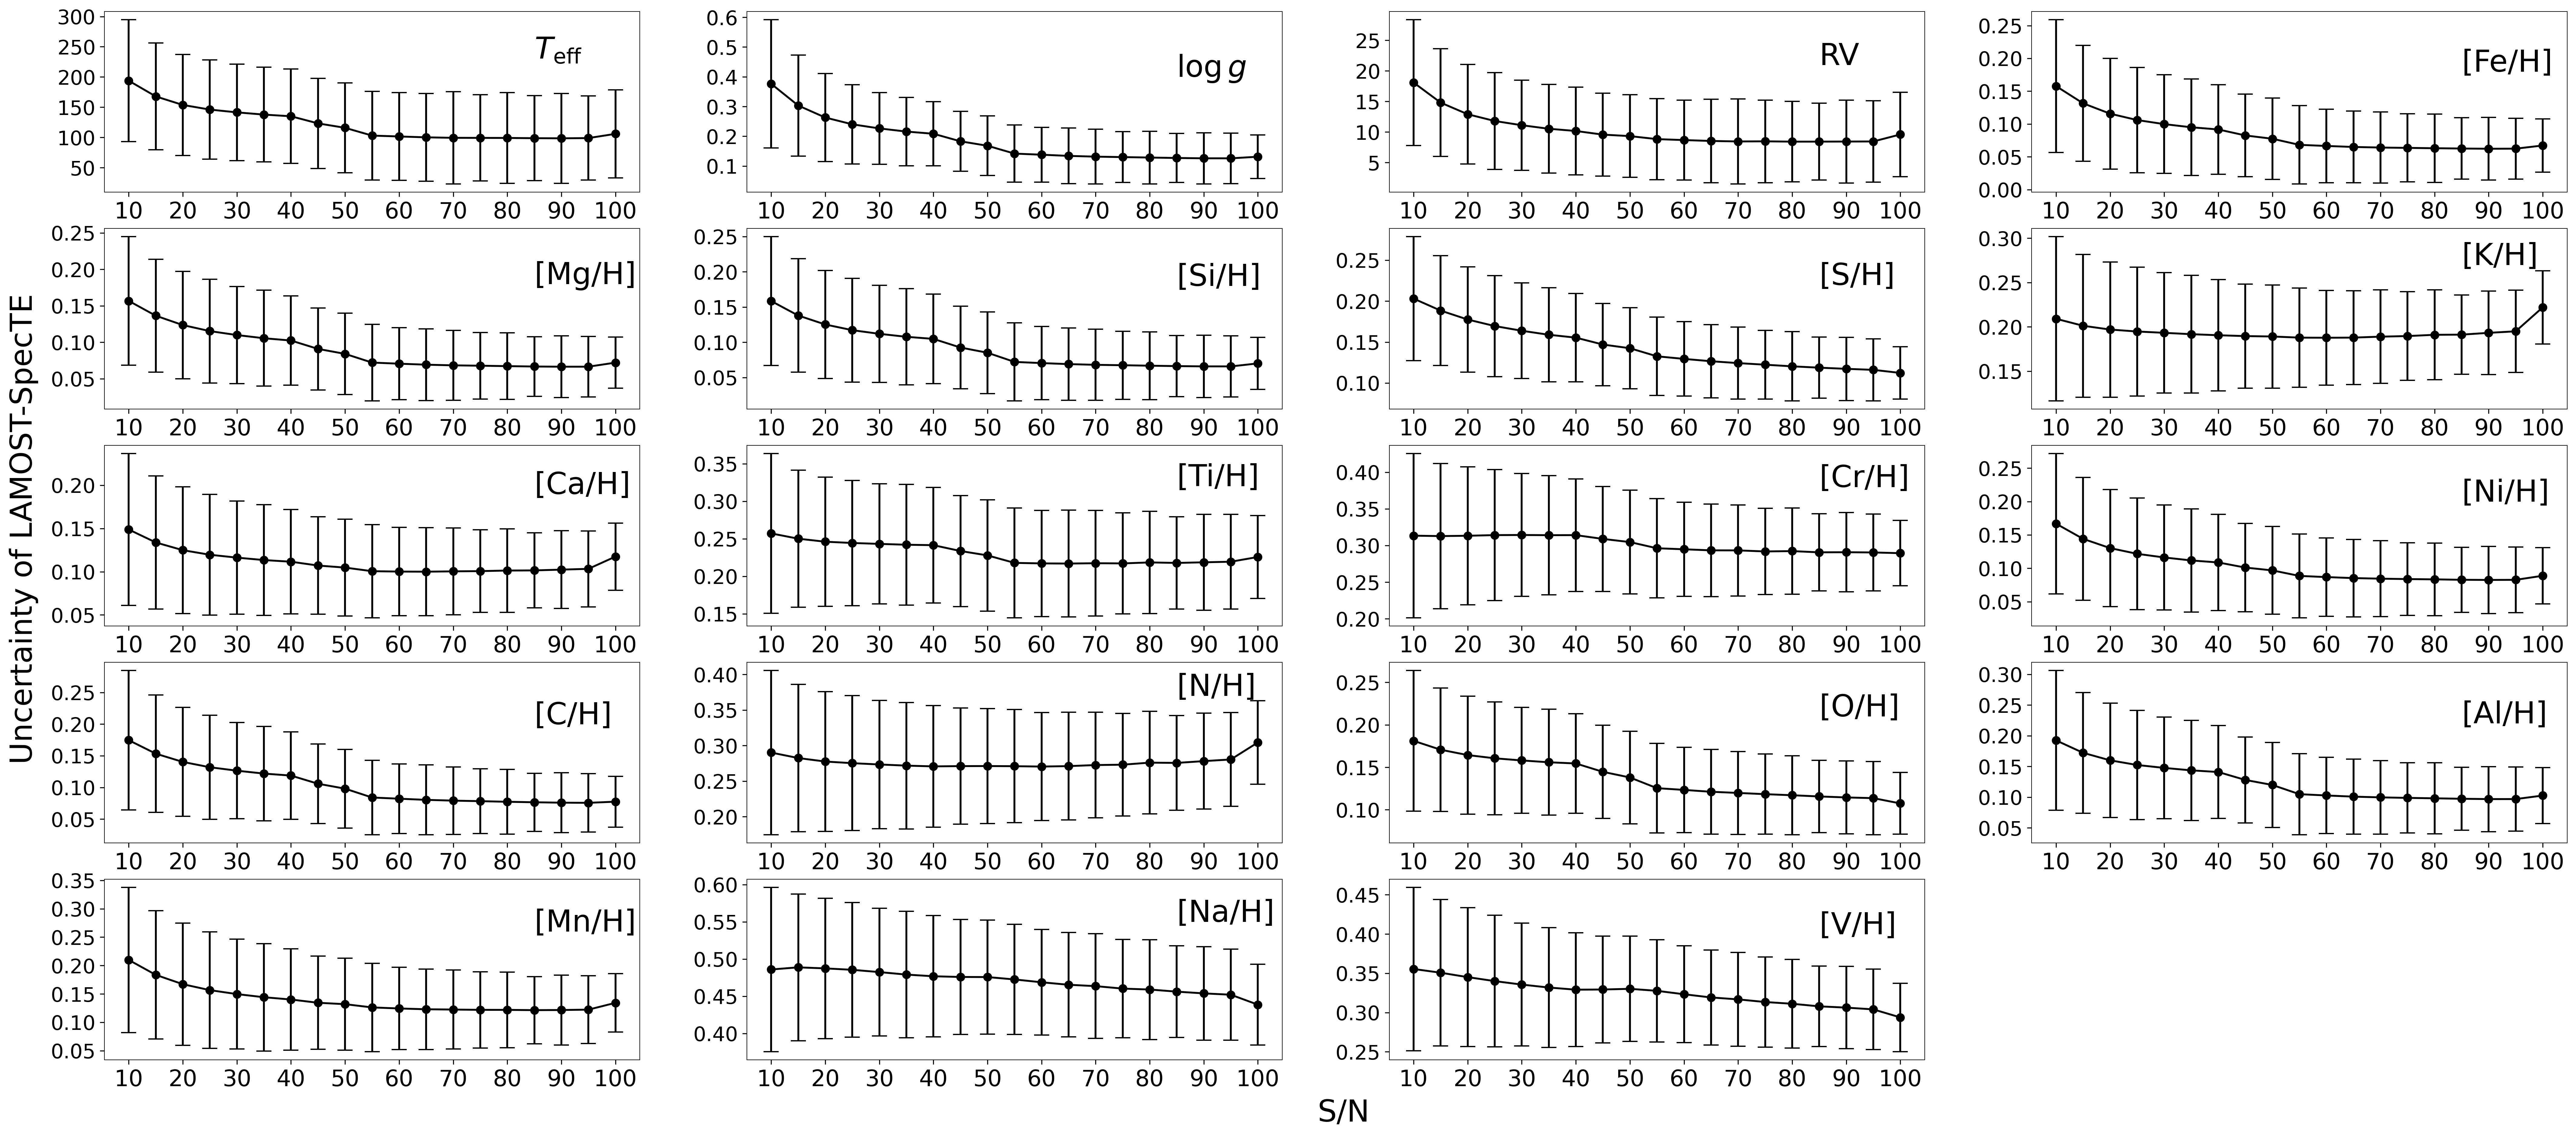

In [44]:
fig = plt.figure(figsize=(35, 15), dpi=300)

# test_loc_list = [150, 0.225, 0.12, 
#                  0.12, 0.13, 0.165,
#                  0.20, 0.15, 0.28, 
#                  0.33, 0.14, 0.14, 
#                  0.33, 0.17, 0.16, 
#                  0.18]
test_loc_list = [230, 0.4, 21, 0.18, 
                 0.18, 0.18, 0.22, 0.27,
                 0.19, 0.32, 0.38, 0.20, 
                 0.20, 0.37, 0.21, 0.22,
                 0.26, 0.55,0.40,]

for i in range(len(label_name_list)):
    ax = plt.subplot(5, 4, i + 1)  # 修改为4行4列

    plt.errorbar(range(len(snr_region_list)), 
                 errorbar_SpecTE_pred[:, i],
                 errorbar_repeated_observation[:, i],
                 color="k",
                 fmt='o-',
                 capsize=6)
    print(errorbar_SpecTE_pred[2, i])
    
    plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], 
               [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], size=18)
    plt.yticks(size=16)
    
    if i == 0:
        plt.text(15, test_loc_list[i], "$T_\mathregular{eff}$", size=24)
    elif i == 1:
        plt.text(15, test_loc_list[i], "$\log g$", size=24)
    elif i == 2:
        plt.text(15, test_loc_list[i], "RV", size=24)
    else:
        plt.text(15, test_loc_list[i], "[%s/H]" % label_name_list[i][:-1], size=24)
        
# 设置边框线宽
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # 边框线宽设置为0.5
    
        
fig.supxlabel("S/N", size=24, position=(0.515, 0.06, 1))
fig.supylabel("Uncertainty of LAMOST-SpecTE", size=24, position=(0.095, 0.5, 1))

plt.savefig('./uncertainties_analysis_snr.png', bbox_inches='tight')

plt.savefig('./uncertainties_analysis_snr.pdf', bbox_inches='tight')
plt.show()


# 统计所有>10的不确定值

In [13]:
# # 定义不同信噪比（SNR）区域的列表

snr_region_list = [[10, 10],]  # >= 10


# 定义要估计的不确定性标签
label_name_list = ['Teff[K]', 'Logg', 'RV', 'FeH', 'MgH', 'SiH', 'SH', 'KH', 'CaH', 'TiH', 'CrH', 'NiH', 'CH', 'NH', 'OH', 'AlH', 'MnH','NaH', 'VH']

# 从 SpecTE_catalog 数据中提取不确定性估计
SpecTE_pred_err = merged_catalog[["%s_uncertainty" % name for name in label_name_list]].values.astype(np.float32)
# 计算 SNR 的最小值
snrg = merged_catalog['snrg']
# 初始化一个数组来存储每个 SNR 区域的不确定性
errorbar_SpecTE_pred = np.zeros((len(snr_region_list), len(label_name_list)))

# 计算重复观测的不确定性
# 按 obsid 分组并计算计数、均值和标准差
gr_count = merged_catalog.groupby(by=['uid']).count()
gr_mean = merged_catalog.groupby(by=['uid']).mean()
gr_std = merged_catalog.groupby(by=['uid']).std()
# 仅保留 min_snr >= 5 的观测值
mean_gr = gr_mean[gr_count['snrg'] >= 5][label_name_list].values
std_gr = gr_std[gr_count['snrg'] >= 5][label_name_list].values
snr_gr = gr_mean[gr_count['snrg'] >= 5]["snrg"]
# 初始化一个数组来存储每个 SNR 区域的重复观测不确定性
errorbar_repeated_observation = np.zeros((len(snr_region_list), len(label_name_list)))

In [14]:

# 遍历每个 SNR 区域
count = 0
for snr_region in tqdm(snr_region_list):
    # 根据 SNR 区域划分数据索引
    if snr_region[0] < snr_region[1]:
        snr_index_SpecTE_pred = np.where(snrg.apply(lambda x: True if x < snr_region[1] and x >= snr_region[0] else False))[0]
        snr_index_repeated_observation = np.where(snr_gr.apply(lambda x: True if x < snr_region[1] and x >= snr_region[0] else False))[0]
    else:  # 处理最后一个 SNR 区域
        snr_index_SpecTE_pred = np.where(snrg.apply(lambda x: True if x >= snr_region[0] else False))[0]
        snr_index_repeated_observation = np.where(snr_gr.apply(lambda x: True if x >= snr_region[0] else False))[0]
    
    # 计算每个 SNR 区域内的不确定性均值
    err_mean_SpecTE_pred = SpecTE_pred_err[snr_index_SpecTE_pred].mean(axis=0)
    err_mean_repeated_observation = std_gr[snr_index_repeated_observation].mean(axis=0)
    
    # 将计算结果存入数组
    errorbar_SpecTE_pred[count] = err_mean_SpecTE_pred
    errorbar_repeated_observation[count] = err_mean_repeated_observation
    count += 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


In [17]:
for i in range (len(errorbar_SpecTE_pred[0])):
    print(label_name_list[i], errorbar_SpecTE_pred[0][i])

Teff[K] 139.104736328125
Logg 0.22806712985038757
RV 11.842485427856445
FeH 0.10289911925792694
MgH 0.10893379151821136
SiH 0.10995036363601685
SH 0.1608784943819046
KH 0.20274411141872406
CaH 0.12202474474906921
TiH 0.23766553401947021
CrH 0.3057846128940582
NiH 0.11892394721508026
CH 0.12193701416254044
NH 0.2803024351596832
OH 0.14906206727027893
AlH 0.1408444344997406
MnH 0.15491017699241638
NaH 0.47279584407806396
VH 0.33187198638916016
